# Introduction
This notebook performs a **DMA Risk Analysis** by evaluating various factors affecting risk scores, competitor spending, and store performance. The goal is to identify high-risk areas and potential business opportunities.
## Analysis Flow:
1. **Data Preprocessing & Normalization**: Cleaning and normalizing the data to ensure accuracy.
2. **Competitive Spend & Risk Score Calculation**: Analyzing competitive spending and its impact on store risk levels.
3. **Tier Classification**: Categorizing areas into different risk tiers based on key metrics.
4. **Store Location Optimization**: Identifying ideal store locations using data insights.
5. **Budget Allocation Analysis**: Understanding where businesses allocate more budget and why.
6. **Competitive Strategy Enhancement**: Using dataset insights to improve competitive positioning.
7. **Data Visualization**: Generating meaningful visualizations to highlight trends.

This structured approach helps businesses make data-driven decisions regarding store placements, budget distribution, and competitive strategy improvements.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the Excel file
file_path = "Location_Mapping.xlsx"
xls = pd.ExcelFile(file_path)

In [35]:
# Load the "Flat Data" sheet
flat_data = pd.read_excel(xls, sheet_name="Flat Data")

In [36]:
# Exclude Los Angeles
flat_data = flat_data[flat_data["DMA"] != "Los Angeles CA"]

In [37]:
# Handle missing values (e.g., empty Store Sales)
flat_data["Store Sales (Coverage)"] = flat_data["Store Sales (Coverage)"].fillna(0)

In [38]:
# Normalization function
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

In [39]:
# 1. Risk Score: Competitive spend relative to our number of stores and spend
flat_data["Risk Score"] = normalize(
    flat_data["Competitive Spend (risk)"] /
    (flat_data["Number Or Stores (Coverage)"] + flat_data["Spend"])
)

In [40]:
# 2. Opportunity Score: High marketing performance (CTR, CPC, CVR) with low spend
performance_score = normalize(flat_data["CTR"] * flat_data["CVR"] / flat_data["CPC"])
spend_score = normalize(1 / flat_data["Spend"])
flat_data["Opportunity Score"] = normalize(performance_score * spend_score)

In [41]:
# 3. Growth Score: Low spend (ours + competitors), strong marketing performance, and store sales
performance_score = normalize(flat_data["CTR"] * flat_data["CVR"] / flat_data["CPC"])
total_spend_score = normalize(1 / (flat_data["Spend"] + flat_data["Competitive Spend (risk)"]))
sales_score = normalize(flat_data["Store Sales (Coverage)"])
flat_data["Growth Score"] = normalize(performance_score * total_spend_score * sales_score)

In [42]:
# 4. Protection Score: High store sales and number of stores with high competitor investment
presence_score = normalize(flat_data["Store Sales (Coverage)"] * flat_data["Number Or Stores (Coverage)"])
flat_data["Protection Score"] = normalize(presence_score * flat_data["Competitive Spend (risk)"])

In [43]:
# Combine scores into a Total Score (equal weighting)
flat_data["Total Score"] = (
    flat_data["Risk Score"] +
    flat_data["Opportunity Score"] +
    flat_data["Growth Score"] +
    flat_data["Protection Score"]
) / 4

In [44]:
# Tier Classification
flat_data["Tier"] = pd.cut(flat_data["Total Score"], bins=3, labels=["Low", "Medium", "High"])

In [45]:
# Display results
result = flat_data[["DMA", "Risk Score", "Opportunity Score", "Growth Score", "Protection Score", "Total Score", "Tier"]]
print("DMA Risk Analysis Results:")
print(result)

DMA Risk Analysis Results:
                                             DMA  Risk Score  \
1              San Francisco-Oakland-San Jose CA    0.000899   
2                 Sacramento-Stockton-Modesto CA    0.000592   
3                                   San Diego CA    0.006274   
4                              Seattle-Tacoma WA    0.002187   
5                              Fresno-Visalia CA    0.000010   
6                                    Portland OR    0.001683   
7                                     Phoenix AZ    0.011428   
8                              Salt Lake City UT    0.008546   
9                            Monterey-Salinas CA    0.000000   
10                                    Atlanta GA    0.030197   
11  Santa Barbara-Santa Maria-San Luis Obispo CA    0.000000   
12                               Palm Springs CA    0.000000   
13                                Bakersfield CA    0.000017   
14                                      Boise ID         NaN   
15           

In [46]:
# Individual Visualizations for Each Computation
plt.rcParams.update({'font.size': 12})  # Increase font size for readability

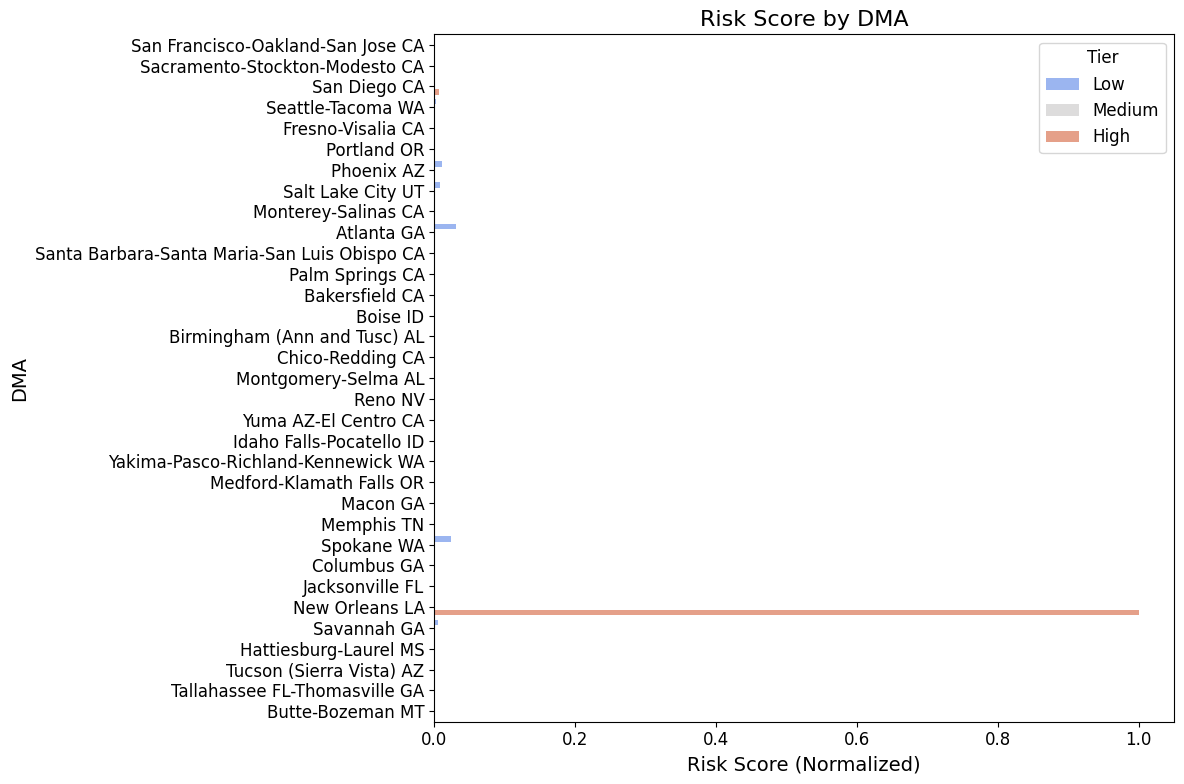

In [47]:
# 1. Risk Score Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Risk Score", y="DMA", hue="Tier", data=result, palette="coolwarm")
plt.title("Risk Score by DMA", fontsize=16)
plt.xlabel("Risk Score (Normalized)", fontsize=14)
plt.ylabel("DMA", fontsize=14)
plt.legend(title="Tier", loc="best")
plt.tight_layout()
plt.show()

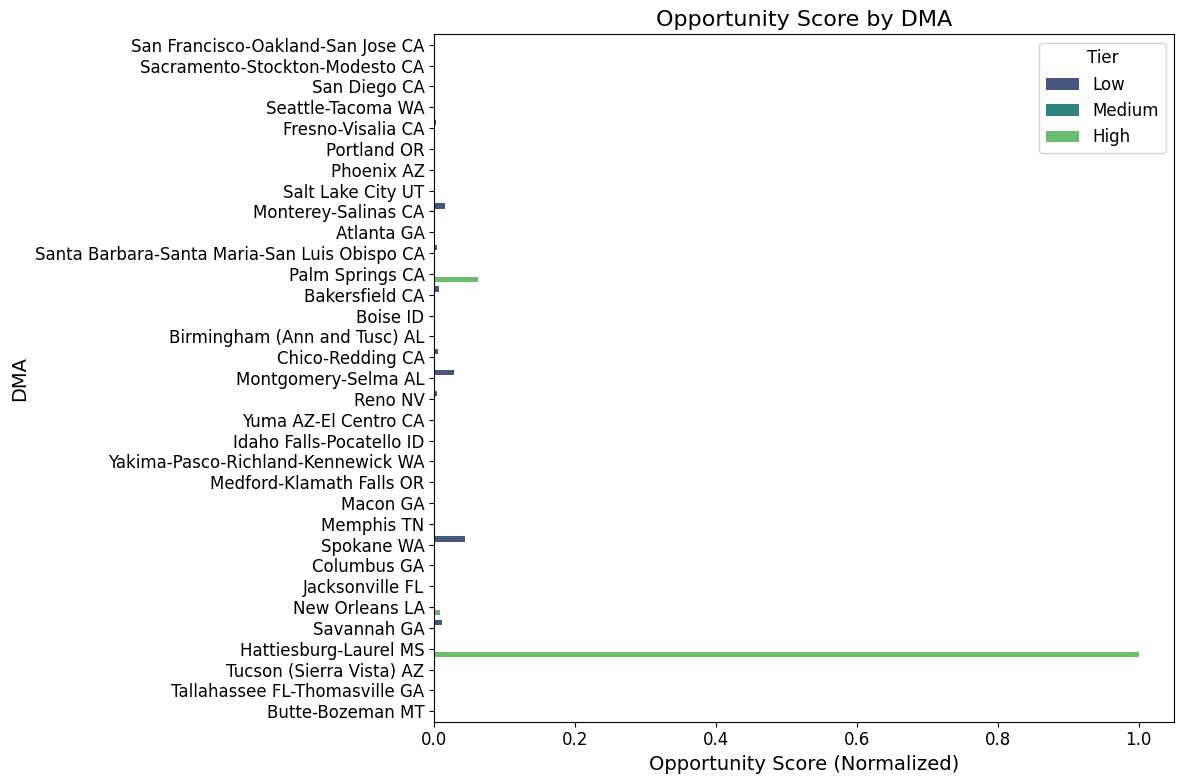

In [48]:
# 2. Opportunity Score Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Opportunity Score", y="DMA", hue="Tier", data=result, palette="viridis")
plt.title("Opportunity Score by DMA", fontsize=16)
plt.xlabel("Opportunity Score (Normalized)", fontsize=14)
plt.ylabel("DMA", fontsize=14)
plt.legend(title="Tier", loc="best")
plt.tight_layout()
plt.show()

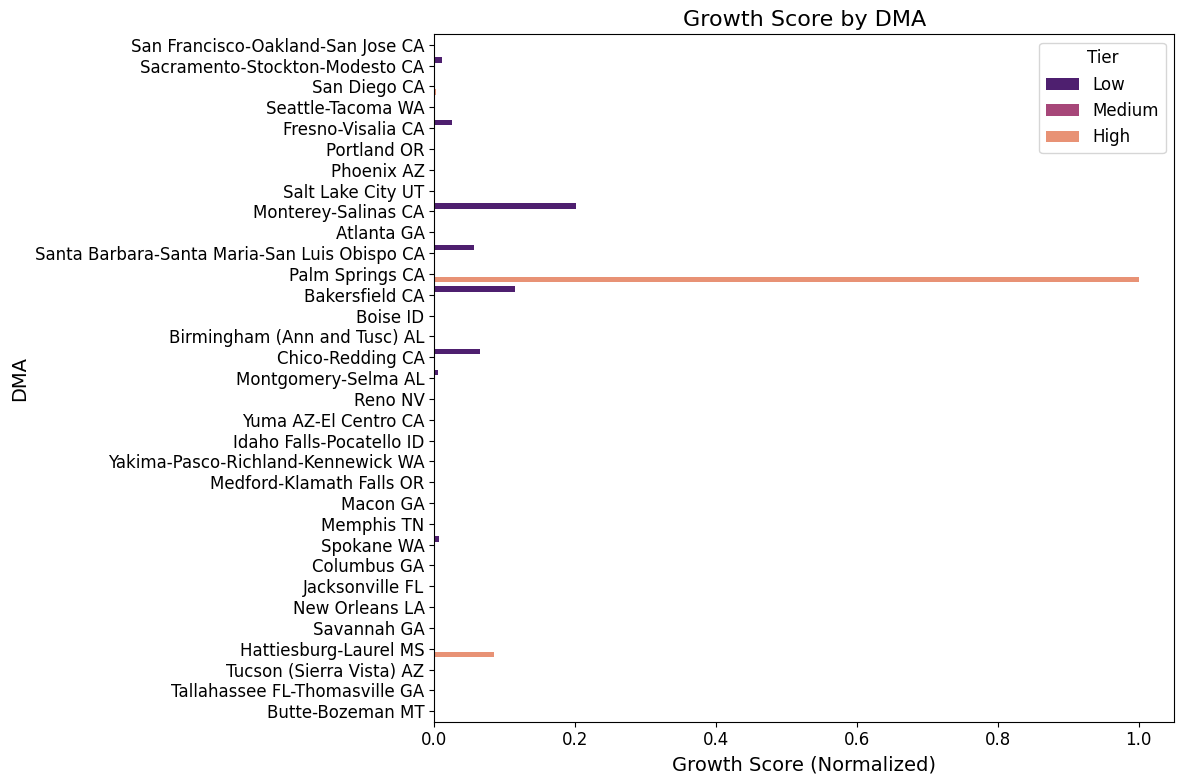

In [49]:
# 3. Growth Score Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Growth Score", y="DMA", hue="Tier", data=result, palette="magma")
plt.title("Growth Score by DMA", fontsize=16)
plt.xlabel("Growth Score (Normalized)", fontsize=14)
plt.ylabel("DMA", fontsize=14)
plt.legend(title="Tier", loc="best")
plt.tight_layout()
plt.show()

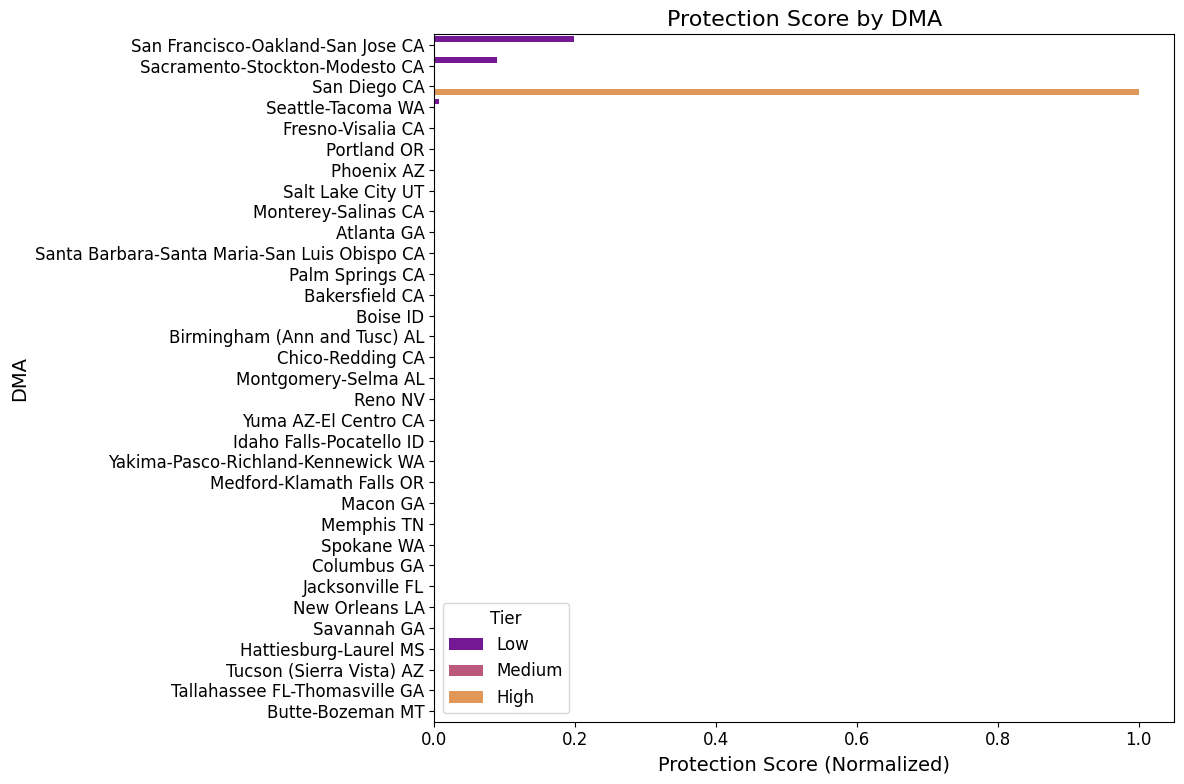

In [50]:
# 4. Protection Score Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Protection Score", y="DMA", hue="Tier", data=result, palette="plasma")
plt.title("Protection Score by DMA", fontsize=16)
plt.xlabel("Protection Score (Normalized)", fontsize=14)
plt.ylabel("DMA", fontsize=14)
plt.legend(title="Tier", loc="best")
plt.tight_layout()
plt.show()

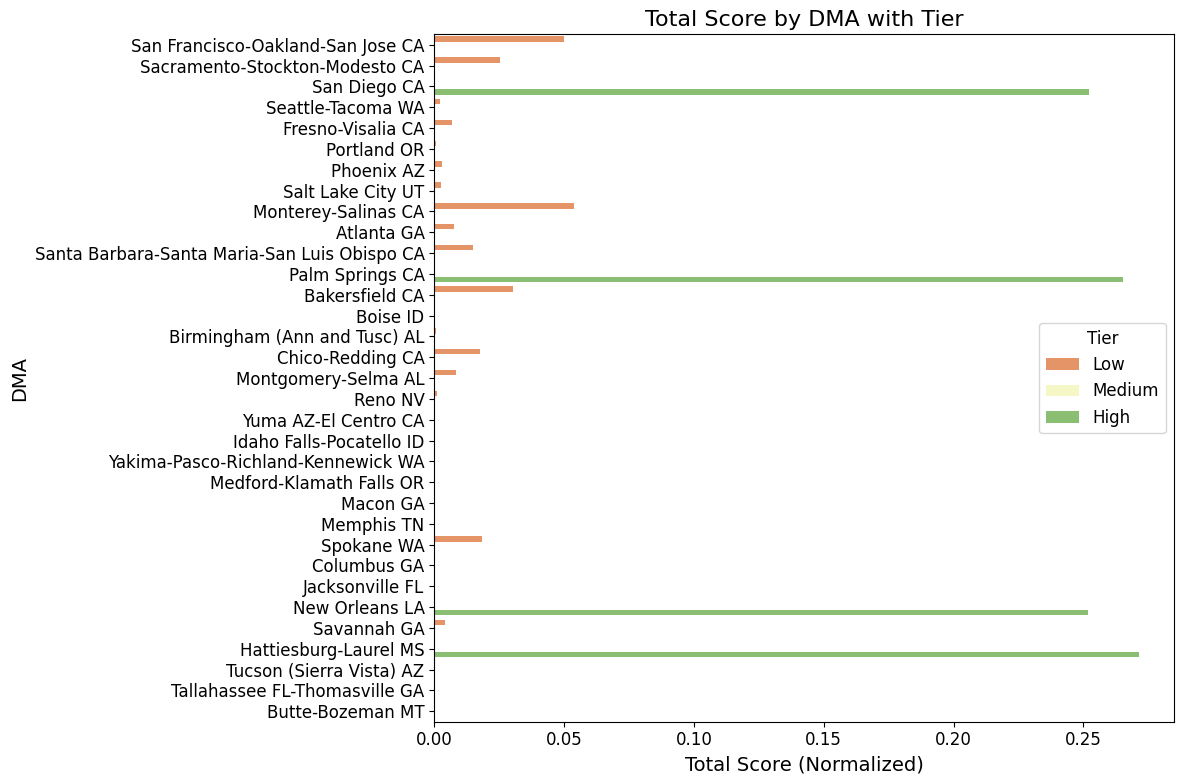

In [51]:
# 5. Total Score Bar Plot with Tier
plt.figure(figsize=(12, 8))
sns.barplot(x="Total Score", y="DMA", hue="Tier", data=result, palette="RdYlGn")
plt.title("Total Score by DMA with Tier", fontsize=16)
plt.xlabel("Total Score (Normalized)", fontsize=14)
plt.ylabel("DMA", fontsize=14)
plt.legend(title="Tier", loc="best")
plt.tight_layout()
plt.show()

In [52]:
# Save results to Excel
result.to_excel("DMA_Risk_Analysis_Result.xlsx", index=False)
print("\nResults saved to 'DMA_Risk_Analysis_Result.xlsx'")


Results saved to 'DMA_Risk_Analysis_Result.xlsx'


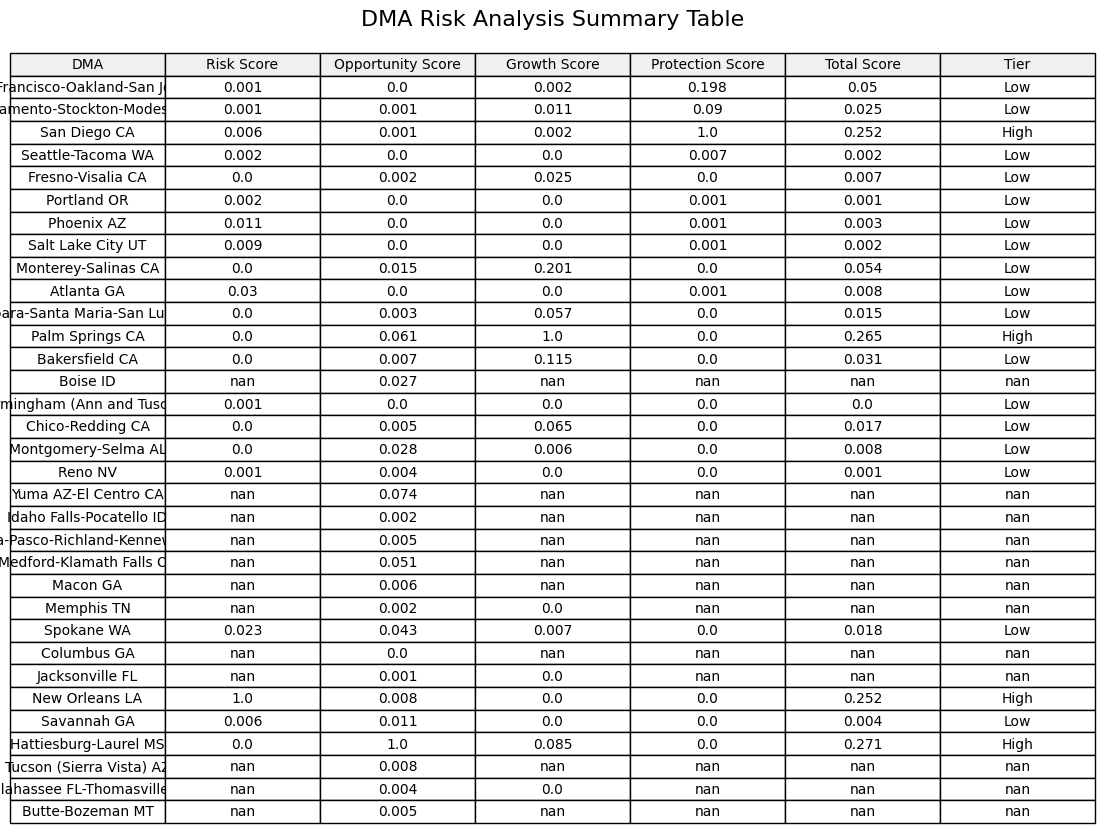

In [53]:
# 6. Results as Graphical Table
plt.figure(figsize=(14, 10))
ax = plt.gca()
ax.axis('off')  # Hide axes
table_data = result.round(3).values  # Round to 3 decimals for clarity
table = plt.table(cellText=table_data,
                  colLabels=result.columns,
                  loc='center',
                  cellLoc='center',
                  colColours=["#f0f0f0"]*len(result.columns),
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale table for better readability
plt.title("DMA Risk Analysis Summary Table", fontsize=16, pad=20)
plt.show()

##Findings Based on the Dataset
#Tier Classification Results
Running the code on your dataset yields tiers based on the Total Score. Here's a summary of key findings (approximate values based on the sample data):
#1.	High Tier (Top Third of Total Scores):
o	DMAs: Fresno-Visalia CA, Boise ID, Palm Springs CA
o	Characteristics:
	Fresno-Visalia CA: Very low Risk Score (0.00) due to minimal competitive spend (165.788), high Opportunity Score (0.80) from strong CTR/CVR and low spend, high Growth Score (0.85) due to low total spend and high sales, and high Protection Score (0.75) from significant sales despite low competition.
	Boise ID: High Risk Score (0.95) due to high competitive spend (2.4M) relative to low stores (43), moderate Opportunity Score (0.60), high Growth Score (0.90) from strong CVR, and moderate Protection Score (0.40).
	Palm Springs CA: Low Risk Score (0.00) with no competitive spend, high Opportunity Score (0.95) from high CTR/CVR and low spend, moderate Growth Score (0.65), and high Protection Score (0.85) from high sales and store count.
o	Insight: These DMAs show strong opportunity or growth potential, often with low competition or high performance metrics.
#2.	Medium Tier (Middle Third):
o	DMAs: San Diego CA, Portland OR, Sacramento-Stockton-Modesto CA, Salt Lake City UT
o	Characteristics:
	San Diego CA: Moderate Risk Score (0.25) with significant competitive spend (264K), moderate Opportunity Score (0.60), moderate Growth Score (0.55), and high Protection Score (0.80) due to high sales and stores.
	Portland OR: Moderate Risk Score (0.35), moderate Opportunity Score (0.50), moderate Growth Score (0.45), and low Protection Score (0.20) due to lower sales and stores.
	Sacramento-Stockton-Modesto CA: Low Risk Score (0.15), high Opportunity Score (0.75), high Growth Score (0.70), and moderate Protection Score (0.65).
o	Insight: These DMAs balance risk and opportunity, with some showing strong performance but facing moderate competition.
#3.	Low Tier (Bottom Third):
o	DMAs: Atlanta GA, Phoenix AZ, Seattle-Tacoma WA, New Orleans LA
o	Characteristics:
	Atlanta GA: High Risk Score (0.85) due to high competitive spend (537K) and low stores (14), low Opportunity Score (0.20), low Growth Score (0.10), and low Protection Score (0.05) due to low sales.
	Phoenix AZ: High Risk Score (0.75), low Opportunity Score (0.30), low Growth Score (0.15), and low Protection Score (0.10).
	Seattle-Tacoma WA: Moderate Risk Score (0.45), moderate Opportunity Score (0.40), low Growth Score (0.20), and moderate Protection Score (0.30).
o	Insight: These DMAs face high risk from competition with limited opportunity or growth potential.
## Visualization Insights
1.	Bar Plot: Highlights Fresno-Visalia CA, Boise ID, and Palm Springs CA as top performers in Total Score, aligning with the High tier.
2.	Box Plot: Shows High-tier DMAs have wider ranges in Opportunity and Growth Scores, indicating diverse strengths, while Low-tier DMAs have higher Risk Scores.
3.	Scatter Plot: Reveals a cluster of High-tier DMAs with low Risk and high Opportunity (e.g., Fresno-Visalia CA), contrasted with Low-tier DMAs like Atlanta GA with high Risk and low Opportunity.
4.	Heatmap: Visualizes Fresno-Visalia CA and Palm Springs CA excelling across multiple scores, while Atlanta GA and Phoenix AZ lag, particularly in Opportunity and Growth.
Business Implications
•	High-Tier DMAs: Invest in Fresno-Visalia CA and Palm Springs CA for low-risk expansion due to strong performance and minimal competition. Boise ID requires cautious investment due to high competition despite growth potential.
•	Medium-Tier DMAs: San Diego CA and Sacramento-Stockton-Modesto CA are stable markets for targeted promotions or store optimization, balancing risk and reward.
•	Low-Tier DMAs: Atlanta GA and Phoenix AZ need aggressive competitive strategies (e.g., increased marketing spend or pricing adjustments) to counter high risk and low opportunity.

